In [106]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [109]:
# Remove "/5" from the 'RATE' column and convert to numeric
df['rate'] = df['rate'].astype(str).str.replace("/5", "", regex=False).str.strip()

In [110]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [111]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

question :- what type of restaurant do the majority customers

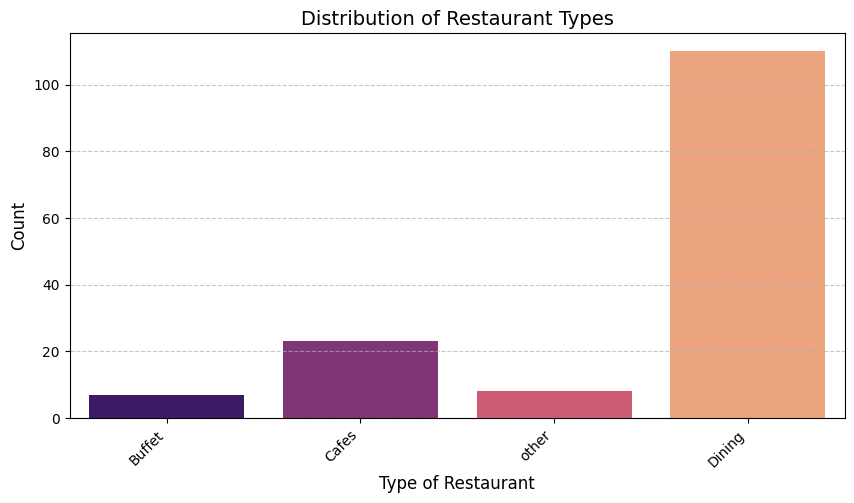

In [112]:
# Set figure size
plt.figure(figsize=(10, 5))

# Create a count plot with different colors
sns.countplot(x=df['listed_in(type)'], hue=df['listed_in(type)'], palette="magma", legend=False)

# Formatting
plt.xlabel("Type of Restaurant", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Restaurant Types", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

conclusion = majoriy of the restaurant falls unnder the dining category

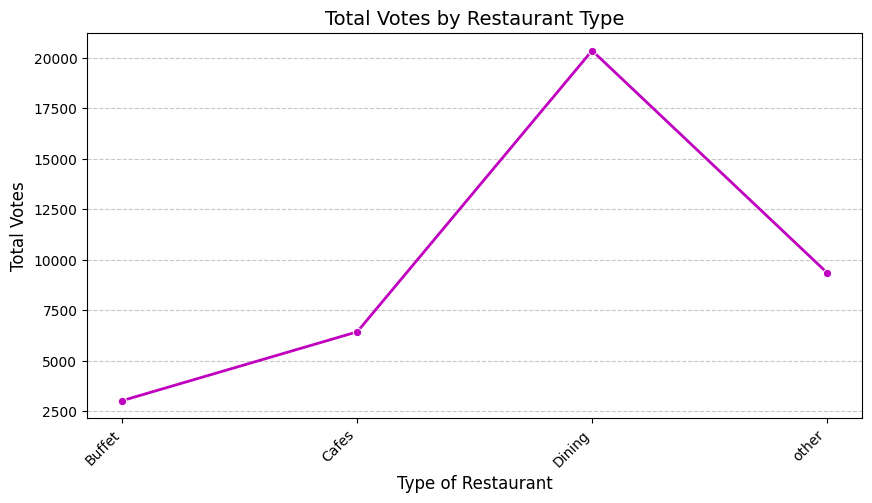

In [113]:

# Group by restaurant type and sum votes
restaurant_votes = df.groupby("listed_in(type)")["votes"].sum().reset_index()

# Set figure size
plt.figure(figsize=(10, 5))

# Plot line graph
sns.lineplot(data=restaurant_votes, x="listed_in(type)", y="votes", marker="o", linewidth=2, color="m")

# Formatting
plt.xlabel("Type of Restaurant", fontsize=12)
plt.ylabel("Total Votes", fontsize=12)
plt.title("Total Votes by Restaurant Type", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

C:\Users\SCP\AppData\Local\Temp\ipykernel_4032\962353434.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_counts, x="Rating", y="Count", palette="viridis")


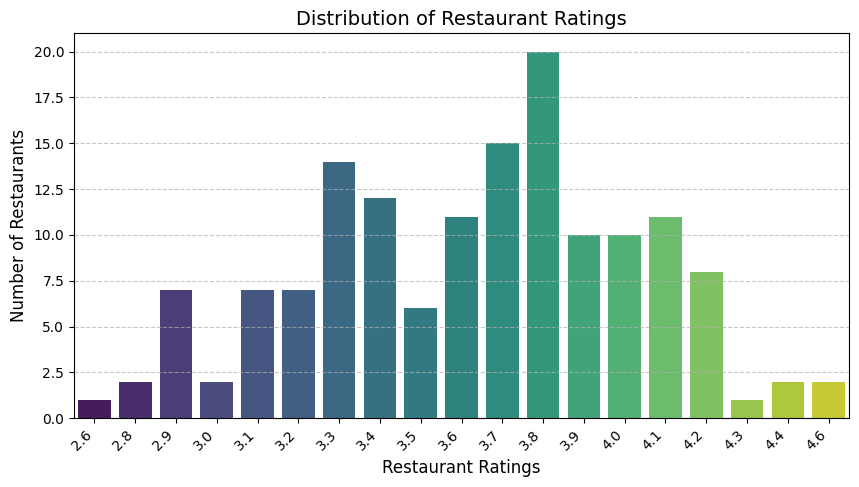

In [114]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Convert to float, handling missing values

# Count the occurrences of each rating
rating_counts = df['rate'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Sort by rating
rating_counts = rating_counts.sort_values(by='Rating')

# Plot the distribution of ratings
plt.figure(figsize=(10, 5))
sns.barplot(data=rating_counts, x="Rating", y="Count", palette="viridis")

# Formatting
plt.xlabel("Restaurant Ratings", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.title("Distribution of Restaurant Ratings", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

conclusion = The majority of restaurants have ratings between 3.5 to 4.5 stars.

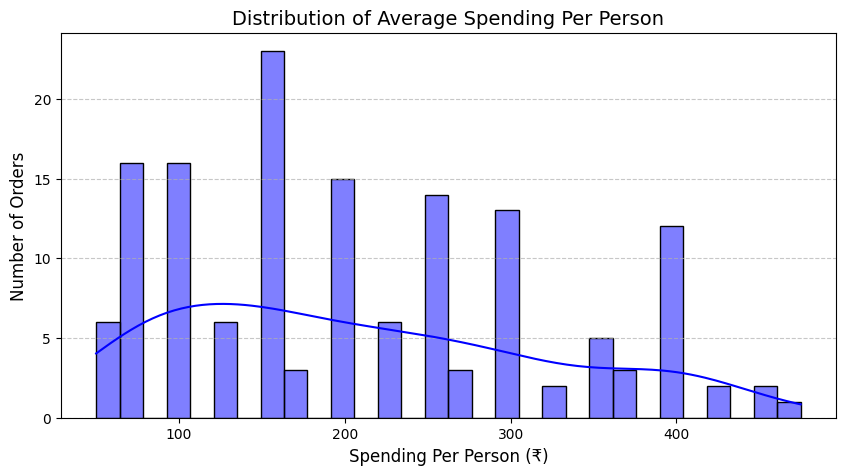

In [ ]:
# Check if the cost column exists
if 'approx_cost(for two people)' in df.columns:
    # Clean and convert 'approx_cost(for two people)' to numeric
    df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '').str.strip()
    df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

    # Calculate per person cost (approx_cost / 2)
    df['cost_per_person'] = df['approx_cost(for two people)'] / 2

    # Plot Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(df['cost_per_person'], bins=30, kde=True, color="blue")
    plt.xlabel("Spending Per Person (₹)", fontsize=12)
    plt.ylabel("Number of Orders", fontsize=12)
    plt.title("Distribution of Average Spending Per Person", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()x


<Axes: xlabel='online_order', ylabel='rate'>

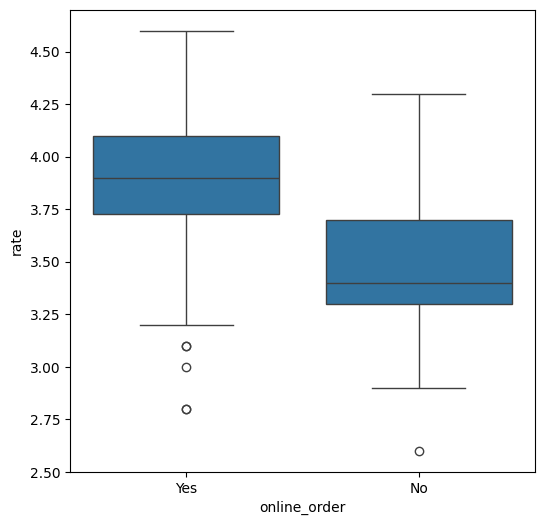

In [116]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order' , y= 'rate', data=df)

conclusion = offline order received lower rating in the comparision of online order

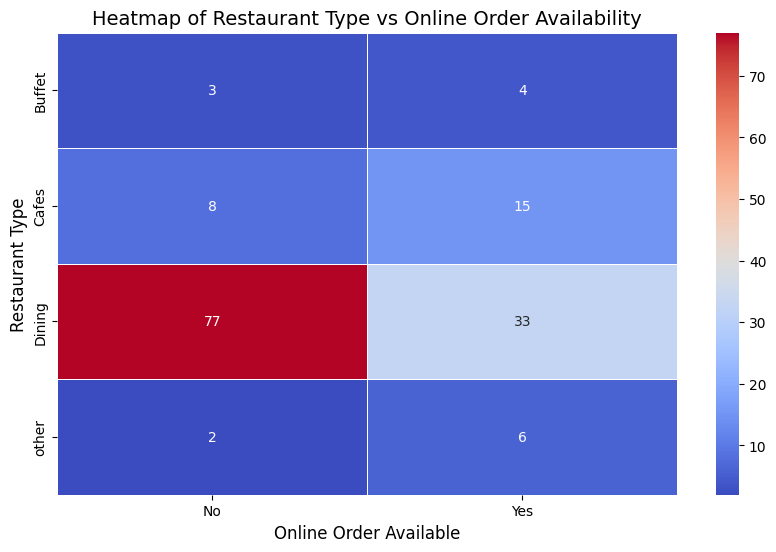

In [117]:
# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)

# Formatting
plt.xlabel("Online Order Available", fontsize=12)
plt.ylabel("Restaurant Type", fontsize=12)
plt.title("Heatmap of Restaurant Type vs Online Order Availability", fontsize=14)

# Show plot
plt.show()